In [3]:
# Import necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.utils import to_categorical 

In [5]:
# Load the Fashion MNIST dataset

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 35s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [7]:
# Preprocess the data

In [8]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Build the CNN model

In [10]:
model = Sequential()

In [11]:
# Add layers to the model

In [12]:
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
# Compile the model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model

In [16]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.7163 - loss: 0.7943 - val_accuracy: 0.8522 - val_loss: 0.4105
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.8710 - loss: 0.3525 - val_accuracy: 0.8861 - val_loss: 0.3174
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.8922 - loss: 0.2981 - val_accuracy: 0.8763 - val_loss: 0.3306
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9023 - loss: 0.2652 - val_accuracy: 0.8984 - val_loss: 0.2843
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9129 - loss: 0.2339 - val_accuracy: 0.9023 - val_loss: 0.2688
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9234 - loss: 0.2050 - val_accuracy: 0.9062 - val_loss: 0.2528
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9292 - loss: 0.1913 - val_accuracy: 0.9048 - val_loss: 0.2620
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9340 - loss: 0.1737 - 

In [17]:
# Evaluate the model

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9072 - loss: 0.2944
Test accuracy: 0.909500002861023


In [19]:
# Save the model in the Keras format

In [20]:
model.save('fashion_mnist_cnn.keras')

In [21]:
# Make predictions on test data
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [22]:
# Function to plot the images along with predictions
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

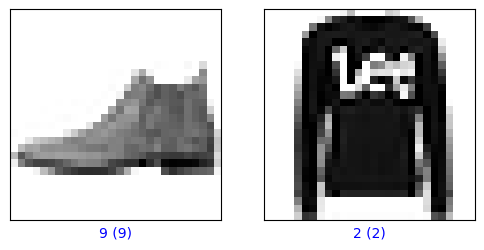

In [30]:
# Plot the first two test images and their predicted labels
plt.figure(figsize=(6,3))
for i in range(2):
    plt.subplot(1,2,i+1)
    plot_image(predictions[i], np.argmax(y_test[i]), x_test[i].reshape(28, 28))
plt.show()